In [2]:
# begin by impoprting some useful libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sklearn.metrics import r2_score
from scipy import stats

In [3]:

cl_20_path = '../refinement_optimization/closed/denswt/20/'
cl_25_path = '../refinement_optimization/closed/denswt/25/'
cl_30_path = '../refinement_optimization/closed/denswt/30/'
cl_35_path = '../refinement_optimization/closed/denswt/35/'
cl_40_path = '../refinement_optimization/closed/denswt/40/'
cl_45_path = '../refinement_optimization/closed/denswt/45/'
cl_50_path = '../refinement_optimization/closed/denswt/50/'

op_20_path = '../refinement_optimization/open/denswt/20/'
op_25_path = '../refinement_optimization/open/denswt/25/'
op_30_path = '../refinement_optimization/open/denswt/30/'
op_35_path = '../refinement_optimization/open/denswt/35/'
op_40_path = '../refinement_optimization/open/denswt/40/'
op_45_path = '../refinement_optimization/open/denswt/45/'
op_50_path = '../refinement_optimization/open/denswt/50/'

In [4]:
cl_20_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/20/'
cl_25_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/25/'
cl_30_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/30/'
cl_35_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/35/'
cl_40_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/40/'
cl_45_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/45/'
cl_50_path = '/home/beckml/CFTR/zCFTR_WT_closed/denswt/50/'

op_20_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/20/'
op_25_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/25/'
op_30_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/30/'
op_35_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/35/'
op_40_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/40/'
op_45_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/45/'
op_50_path = '/home/beckml/CFTR/zCFTR_WT_open/denswt/50/'

In [15]:
denswts = [20,25,30,35,40,45,50]

## Determine Lowest Scoring Structure 

In [34]:
op_50_score = []
for i in range(100): 
    fnm = op_50_path +'scores/' + 'score_{}.sc'.format(i)
    x = np.genfromtxt(fnm, dtype = ['U15', 'float64'], skip_header = 1 )
    op_50_score.append(float(x[1][1]))

In [35]:
for i,val in enumerate(op_50_score):
    if val == min(op_50_score):
        print(val)
        print(i)

-24176.194
98


## Closed State

In [5]:
cl_res_num = 1172

In [6]:
cl_FSC_20 = np.array([])
cl_20_elec_dens_fast = np.array([])
cl_20_score = np.array([])

for i in range(100):
    with open(cl_20_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_20_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_20 = np.append(cl_FSC_20, x)
    f.close()

for i in range(100):
    fnm = cl_20_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_20_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_20_elec_dens_fast = np.append(cl_20_elec_dens_fast, x)
        cl_20_score = np.append(cl_20_score, y)
    f.close()
    
    
    
metric_20 = cl_FSC_20 - 0.04*(cl_20_score - cl_20_elec_dens_fast)/cl_res_num 
avg_20 = metric_20.mean()

sigma_f_20 = np.sqrt(((0.04/cl_res_num)**2) * (cl_20_score.std()**2 +  cl_20_elec_dens_fast.std()**2 - 2*cl_20_score.std()*cl_20_elec_dens_fast.std()))

stdev_20 = np.sqrt(cl_FSC_20.std()**2 + sigma_f_20**2 - 2*cl_FSC_20.std()*sigma_f_20)


In [7]:
cl_FSC_25 = np.array([])
cl_25_elec_dens_fast = np.array([])
cl_25_score = np.array([])

for i in range(100):
    with open(cl_25_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_25_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_25 = np.append(cl_FSC_25, x)
    f.close()

for i in range(100):
    fnm = cl_25_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_25_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_25_elec_dens_fast = np.append(cl_25_elec_dens_fast, x)
        cl_25_score = np.append(cl_25_score, y)
    f.close()
    
    



metric_25 = cl_FSC_25 - 0.04*(cl_25_score - cl_25_elec_dens_fast)/cl_res_num
avg_25 = metric_25.mean()

sigma_f_25 = np.sqrt(((0.04/cl_res_num)**2) * (cl_25_score.std()**2 +  cl_25_elec_dens_fast.std()**2 - 2*cl_25_score.std()*cl_25_elec_dens_fast.std()))

stdev_25 = np.sqrt(cl_FSC_25.std()**2 + sigma_f_25**2 - 2*cl_FSC_25.std()*sigma_f_25)


In [8]:
cl_FSC_30 = np.array([])
cl_30_elec_dens_fast = np.array([])
cl_30_score = np.array([])

for i in range(100):
    with open(cl_30_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_30_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_30 = np.append(cl_FSC_30, x)
    f.close()

for i in range(100):
    fnm = cl_30_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_30_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_30_elec_dens_fast = np.append(cl_30_elec_dens_fast, x)
        cl_30_score = np.append(cl_30_score, y)
    f.close()
    
    
    
metric_30 = cl_FSC_30 - 0.04*(cl_30_score - cl_30_elec_dens_fast)/cl_res_num
avg_30 = metric_30.mean()

sigma_f_30 = np.sqrt(((0.04/cl_res_num)**2) * (cl_30_score.std()**2 +  cl_30_elec_dens_fast.std()**2 - 2*cl_30_score.std()*cl_30_elec_dens_fast.std()))

stdev_30 = np.sqrt(cl_FSC_30.std()**2 + sigma_f_30**2 - 2*cl_FSC_30.std()*sigma_f_30)

In [9]:
cl_FSC_35 = np.array([])
cl_35_elec_dens_fast = np.array([])
cl_35_score = np.array([])

for i in range(100):
    with open(cl_35_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_35_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_35 = np.append(cl_FSC_35, x)
    f.close()

for i in range(100):
    fnm = cl_35_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_35_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_35_elec_dens_fast = np.append(cl_35_elec_dens_fast, x)
        cl_35_score = np.append(cl_35_score, y)
    f.close()
    
    
    
metric_35 = cl_FSC_35 - 0.04*(cl_35_score - cl_35_elec_dens_fast)/cl_res_num
avg_35 = metric_35.mean()

sigma_f_35 = np.sqrt(((0.04/cl_res_num)**2) * (cl_35_score.std()**2 +  cl_35_elec_dens_fast.std()**2 - 2*cl_35_score.std()*cl_35_elec_dens_fast.std()))

stdev_35 = np.sqrt(cl_FSC_35.std()**2 + sigma_f_35**2 - 2*cl_FSC_35.std()*sigma_f_35)

In [10]:
cl_FSC_40 = np.array([])
cl_40_elec_dens_fast = np.array([])
cl_40_score = np.array([])

for i in range(100):
    with open(cl_40_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_40_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_40 = np.append(cl_FSC_40, x)
    f.close()

for i in range(100):
    fnm = cl_40_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_40_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_40_elec_dens_fast = np.append(cl_40_elec_dens_fast, x)
        cl_40_score = np.append(cl_40_score, y)
    f.close()
    
    
    
metric_40 = cl_FSC_40 - 0.04*(cl_40_score - cl_40_elec_dens_fast)/cl_res_num
avg_40 = metric_40.mean()

sigma_f_40 = np.sqrt(((0.04/cl_res_num)**2) * (cl_40_score.std()**2 +  cl_40_elec_dens_fast.std()**2 - 2*cl_40_score.std()*cl_40_elec_dens_fast.std()))

stdev_40 = np.sqrt(cl_FSC_40.std()**2 + sigma_f_40**2 - 2*cl_FSC_40.std()*sigma_f_40)

In [11]:
cl_FSC_45 = np.array([])
cl_45_elec_dens_fast = np.array([])
cl_45_score = np.array([])

for i in range(100):
    with open(cl_45_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_45_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_45 = np.append(cl_FSC_45, x)
    f.close()

for i in range(100):
    fnm = cl_45_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_45_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_45_elec_dens_fast = np.append(cl_45_elec_dens_fast, x)
        cl_45_score = np.append(cl_45_score, y)
    f.close()
    
    
    
metric_45 = cl_FSC_45 - 0.04*(cl_45_score - cl_45_elec_dens_fast)/cl_res_num
avg_45 = metric_45.mean()

sigma_f_45 = np.sqrt(((0.04/cl_res_num)**2) * (cl_45_score.std()**2 +  cl_45_elec_dens_fast.std()**2 - 2*cl_45_score.std()*cl_45_elec_dens_fast.std()))

stdev_45 = np.sqrt(cl_FSC_45.std()**2 + sigma_f_45**2 - 2*cl_FSC_45.std()*sigma_f_45)



In [12]:
cl_FSC_50 = np.array([])
cl_50_elec_dens_fast = np.array([])
cl_50_score = np.array([])

for i in range(100):
    with open(cl_50_path + '5uak_{}_0001.pdb'.format(i)) as f:
    #with open(cl_50_path + '5uar_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        cl_FSC_50 = np.append(cl_FSC_50, x)
    f.close()

for i in range(100):
    fnm = cl_50_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = cl_50_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        cl_50_elec_dens_fast = np.append(cl_50_elec_dens_fast, x)
        cl_50_score = np.append(cl_50_score, y)
    f.close()
    
    
    
metric_50 = cl_FSC_50 - 0.04*(cl_50_score - cl_50_elec_dens_fast)/cl_res_num
avg_50 = metric_50.mean()

sigma_f_50 = np.sqrt(((0.04/cl_res_num)**2) * (cl_50_score.std()**2 +  cl_50_elec_dens_fast.std()**2 - 2*cl_50_score.std()*cl_50_elec_dens_fast.std()))

stdev_50 = np.sqrt(cl_FSC_50.std()**2 + sigma_f_50**2 - 2*cl_FSC_50.std()*sigma_f_50)


In [13]:
cl_avg_metric = np.array([ avg_20, avg_25, avg_30, avg_35, avg_40, avg_45, avg_50])
cl_stdev_metric = np.array([stdev_20, stdev_25, stdev_30, stdev_35, stdev_40, stdev_45, stdev_50])

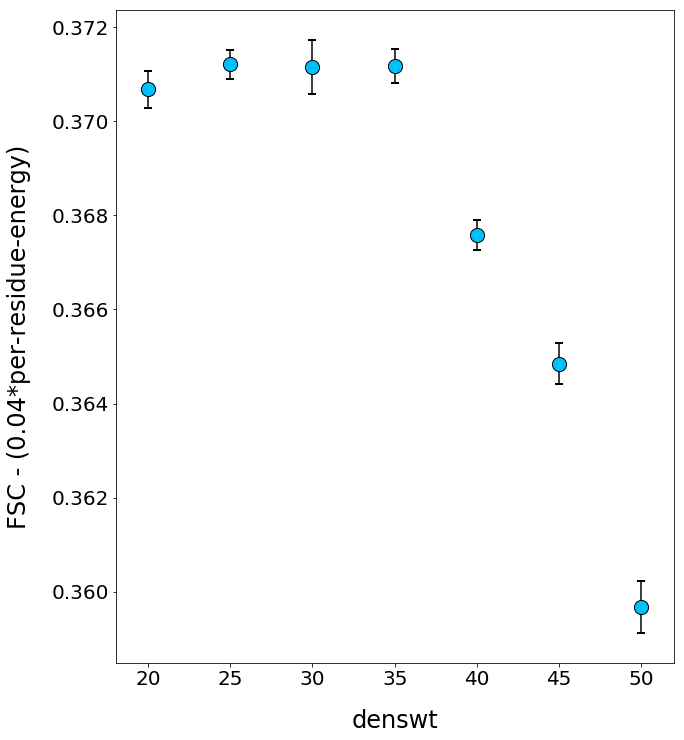

In [29]:
font = 24
padding = 20
plt.figure(figsize = (10,12))

plt.errorbar(denswts, cl_avg_metric,
             yerr = cl_stdev_metric/10,
             fmt = 'o',
             color = 'deepskyblue',
             marker = 'o',
             ecolor = 'k',
             capsize = 4,
             capthick = 2,
             zorder = 1
            )

plt.scatter(denswts, cl_avg_metric, 
             c = 'deepskyblue',
             edgecolors='k', 
            s = 200, 
            zorder=2)

plt.xlabel('denswt', fontsize=font, labelpad = padding)
plt.ylabel('FSC - (0.04*per-residue-energy)', fontsize=font, labelpad = padding)
plt.xticks(fontsize=font-4)
plt.yticks(fontsize=font-4)
plt.savefig('../figures/denswt_hCFTR_closed.svg', format='svg')


## Open State

In [18]:
op_res_num = 1181

In [19]:
op_FSC_20 = np.array([])
op_20_elec_dens_fast = np.array([])
op_20_score = np.array([])

for i in range(100):
    with open(op_20_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_20_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_20 = np.append(op_FSC_20, x)
    f.close()

for i in range(100):
    fnm = op_20_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_20_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_20_elec_dens_fast = np.append(op_20_elec_dens_fast, x)
        op_20_score = np.append(op_20_score, y)
    f.close()
    
    
    
op_metric_20 = op_FSC_20 - 0.04*(op_20_score - op_20_elec_dens_fast)/op_res_num
op_avg_20 = op_metric_20.mean()
op_sigma_f_20 = np.sqrt(((0.04/op_res_num)**2) * (op_20_score.std()**2 +  op_20_elec_dens_fast.std()**2 - 2*op_20_score.std()*op_20_elec_dens_fast.std()))

op_stdev_20 = np.sqrt(op_FSC_20.std()**2 + op_sigma_f_20**2 - 2*op_FSC_20.std()*op_sigma_f_20)


In [20]:
op_FSC_25 = np.array([])
op_25_elec_dens_fast = np.array([])
op_25_score = np.array([])

for i in range(100):
    with open(op_25_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_25_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_25 = np.append(op_FSC_25, x)
    f.close()

for i in range(100):
    fnm = op_25_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_25_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_25_elec_dens_fast = np.append(op_25_elec_dens_fast, x)
        op_25_score = np.append(op_25_score, y)
    f.close()
    
    
    
op_metric_25 = op_FSC_25 - 0.04*(op_25_score - op_25_elec_dens_fast)/op_res_num
op_avg_25 = op_metric_25.mean()
op_sigma_f_25 = np.sqrt(((0.04/op_res_num)**2) * (op_25_score.std()**2 +  op_25_elec_dens_fast.std()**2 - 2*op_25_score.std()*op_25_elec_dens_fast.std()))

op_stdev_25 = np.sqrt(op_FSC_25.std()**2 + op_sigma_f_25**2 - 2*op_FSC_25.std()*op_sigma_f_25)

In [21]:
op_FSC_30 = np.array([])
op_30_elec_dens_fast = np.array([])
op_30_score = np.array([])

for i in range(100):
    with open(op_30_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_30_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_30 = np.append(op_FSC_30, x)
    f.close()

for i in range(100):
    fnm = op_30_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_30_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_30_elec_dens_fast = np.append(op_30_elec_dens_fast, x)
        op_30_score = np.append(op_30_score, y)
    f.close()
    
    
    
op_metric_30 = op_FSC_30 - 0.04*(op_30_score - op_30_elec_dens_fast)/op_res_num
op_avg_30 = op_metric_30.mean()
op_sigma_f_30 = np.sqrt(((0.04/op_res_num)**2) * (op_30_score.std()**2 +  op_30_elec_dens_fast.std()**2 - 2*op_30_score.std()*op_30_elec_dens_fast.std()))

op_stdev_30 = np.sqrt(op_FSC_30.std()**2 + op_sigma_f_30**2 - 2*op_FSC_30.std()*op_sigma_f_30)

In [22]:
op_FSC_35 = np.array([])
op_35_elec_dens_fast = np.array([])
op_35_score = np.array([])

for i in range(100):
    with open(op_35_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_35_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_35 = np.append(op_FSC_35, x)
    f.close()

for i in range(100):
    fnm = op_35_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_35_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_35_elec_dens_fast = np.append(op_35_elec_dens_fast, x)
        op_35_score = np.append(op_35_score, y)
    f.close()
    
    
op_metric_35 = op_FSC_35 - 0.04*(op_35_score - op_35_elec_dens_fast)/op_res_num
op_avg_35 = op_metric_35.mean()
op_sigma_f_35 = np.sqrt(((0.04/op_res_num)**2) * (op_35_score.std()**2 +  op_35_elec_dens_fast.std()**2 - 2*op_35_score.std()*op_35_elec_dens_fast.std()))

op_stdev_35 = np.sqrt(op_FSC_35.std()**2 + op_sigma_f_35**2 - 2*op_FSC_35.std()*op_sigma_f_35)

In [23]:
op_FSC_40 = np.array([])
op_40_elec_dens_fast = np.array([])
op_40_score = np.array([])

for i in range(100):
    with open(op_40_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_40_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_40 = np.append(op_FSC_40, x)
    f.close()

for i in range(100):
    fnm = op_40_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_40_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_40_elec_dens_fast = np.append(op_40_elec_dens_fast, x)
        op_40_score = np.append(op_40_score, y)
    f.close()
    
    
    
op_metric_40 = op_FSC_40 - 0.04*(op_40_score - op_40_elec_dens_fast)/op_res_num
op_avg_40 = op_metric_40.mean()
op_sigma_f_40 = np.sqrt(((0.04/op_res_num)**2) * (op_40_score.std()**2 +  op_40_elec_dens_fast.std()**2 - 2*op_40_score.std()*op_40_elec_dens_fast.std()))

op_stdev_40 = np.sqrt(op_FSC_40.std()**2 + op_sigma_f_40**2 - 2*op_FSC_40.std()*op_sigma_f_40)



In [24]:
op_FSC_45 = np.array([])
op_45_elec_dens_fast = np.array([])
op_45_score = np.array([])

for i in range(100):
    with open(op_45_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_45_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_45 = np.append(op_FSC_45, x)
    f.close()

for i in range(100):
    fnm = op_45_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_45_path  + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_45_elec_dens_fast = np.append(op_45_elec_dens_fast, x)
        op_45_score = np.append(op_45_score, y)
    f.close()
    
    
    
op_metric_45 = op_FSC_45 - 0.04*(op_45_score - op_45_elec_dens_fast)/op_res_num
op_avg_45 = op_metric_45.mean()
op_sigma_f_45 = np.sqrt(((0.04/op_res_num)**2) * (op_45_score.std()**2 +  op_45_elec_dens_fast.std()**2 - 2*op_45_score.std()*op_45_elec_dens_fast.std()))

op_stdev_45 = np.sqrt(op_FSC_45.std()**2 + op_sigma_f_45**2 - 2*op_FSC_45.std()*op_sigma_f_45)


In [25]:
op_FSC_50 = np.array([])
op_50_elec_dens_fast = np.array([])
op_50_score = np.array([])

for i in range(100):
    with open(op_50_path + '6msm_{}_0001.pdb'.format(i)) as f:
    #with open(op_50_path + '5w81_{}_0001.pdb'.format(i)) as f:
        first_line = f.readline()
        x = float(first_line.split(' ')[6])
        op_FSC_50 = np.append(op_FSC_50, x)
    f.close()

for i in range(100):
    fnm = op_50_path +'scores/' + 'score_{}.sc'.format(i)
    #fnm = op_50_path + 'score_{}.sc'.format(i)
    with open(fnm) as f: 
        line = f.readlines()
        x = float(line[2].split()[4])
        y = float(line[2].split()[1])
        op_50_elec_dens_fast = np.append(op_50_elec_dens_fast, x)
        op_50_score = np.append(op_50_score, y)
    f.close()
    
    
    
op_metric_50 = op_FSC_50 - 0.04*(op_50_score - op_50_elec_dens_fast)/op_res_num
op_avg_50 = op_metric_50.mean()
op_sigma_f_50 = np.sqrt(((0.04/op_res_num)**2) * (op_50_score.std()**2 +  op_50_elec_dens_fast.std()**2 - 2*op_50_score.std()*op_50_elec_dens_fast.std()))

op_stdev_50 = np.sqrt(op_FSC_50.std()**2 + op_sigma_f_50**2 - 2*op_FSC_50.std()*op_sigma_f_50)

In [26]:
op_avg_metric = np.array([op_avg_20, op_avg_25, op_avg_30, op_avg_35, op_avg_40, op_avg_45, op_avg_50])

op_stdev_metric = np.array([ op_stdev_20 , op_stdev_25, op_stdev_30, op_stdev_35, op_stdev_40, op_stdev_45, op_stdev_50 ])




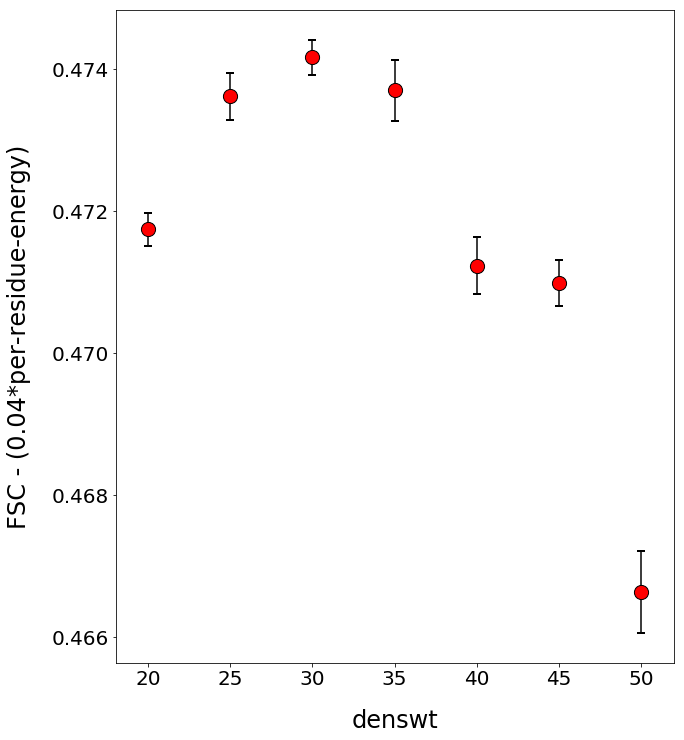

In [30]:
font = 24
padding = 20
plt.figure(figsize = (10,12))

plt.errorbar(denswts, op_avg_metric,
             yerr = op_stdev_metric/10,
             fmt = 'o',
             color = 'r',
             marker = 'o',
             ecolor = 'k',
             capsize = 4,
             capthick = 2,
             zorder = 1
            )

plt.scatter(denswts, op_avg_metric, 
            c = 'r',
            edgecolors='k', 
            s = 200, 
            zorder=2)

plt.xlabel('denswt', fontsize=font, labelpad = padding)
plt.ylabel('FSC - (0.04*per-residue-energy)', fontsize=font, labelpad = padding)
plt.xticks(fontsize=font-4)
plt.yticks(fontsize=font-4)
plt.savefig('../figures/denswt_hCFTR_open.svg', format='svg')